# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on March 3 at 7pm.**

In this assignment, we will continue to work with the [Yelp dataset](https://www.yelp.com/dataset/challenge) that we used in Homework 2-1.

We will continue to try to find culinary **districts** in Las Vegas. As a reminder from last time, these are characterized by **closeness** and **similarity** of restaurants. Use the "longitude" and "latitude" to cluster closeness.

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1. Instead, we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use Latent Semantic Analysis (LSA) on the Yelp reviews to cluster restaurants based off on their reviews. As a reminder, LSA consists of using PCA applied to the document-term matrix.

Now, your feature vectors will contain latitude, longitude and the most relatively important review terms. 

You will apply PCA 3 times. Each time, you will take into account the first $k$ reviews per business, where $k = \{10,100,1000\}$. Many businesses will have less than $k$, or even no reviews. In this case, simply assign to the business the maximum number of reviews it has.
**(4 pts)**

In [1]:
import numpy as np
import scipy as sp
import json
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

df = pd.read_json("C:\\software\\cs 506\\cs506-spring2018-hw2-1-jweixuan\\business.json",lines=True)

In [2]:
i = 100

cat = {}

for line in df.itertuples():
    if "Restaurants" in line.categories and line.city == "Las Vegas":
        #print(line.business_id)
        cat[line.business_id] = [line.longitude,line.latitude]
        
if "O0DxNujKaN-KIfcgbV3MgA" in cat:
    print(cat["O0DxNujKaN-KIfcgbV3MgA"])

[-115.137545876, 36.144531022999999]


In [3]:
print(cat)

{'Pd52CjgyEU3Rb8co6QfTPw': [-115.1708484, 36.066913599999999], '4srfPk1s8nlm1YusyDUbjg': [-115.1189541, 36.064652299999999], 'n7V4cD-KqqE3OXk0irJTyA': [-115.1788768, 36.068258515399997], 'F0fEKpTk7gAmuSFI0KW1eQ': [-115.2416881, 36.111057199999998], 'Wpt0sFHcPtV5MO9He7yMKQ': [-115.10930999999999, 36.130012800000003], 'W1Yr6c2XDx_RBjb6WsV-aQ': [-115.190288481, 36.170706499399998], 'vzx1WdVivFsaN4QYrez2rw': [-115.06235340000001, 36.112895199999997], 'Uy3_5nLo3sYkAuSX6mjdmg': [-115.17140929999999, 36.034243500000002], 'dPxZI9lrKTl5dvFfnb1_Ig': [-115.1186563, 36.010085599999996], 'WfB_SsYeKy83QQsqAAyGVQ': [-115.13607930000001, 36.098632100000003], 'u29lf2yPd-qK5ThAS9FRQQ': [-115.195895992, 36.1440231017], 'KYEZATGRY5aD69ZR6VvyWQ': [-115.263279393, 36.271838337600002], 'W8GVfGILy7an385lZSEvSw': [-115.153558, 36.150371999999997], 'wRmPV-RvcqcjeyUeOaJQCg': [-115.14288740000001, 36.140925199999998], 'EgGdnaotJpPvxCFyZPJeUw': [-115.210341, 36.238059], 'AfL8Ds7ex73tfVbq3EFWKg': [-115.2874508, 36.

In [3]:
import copy
cat_copy = copy.deepcopy(cat)

print(cat_copy)

{'Pd52CjgyEU3Rb8co6QfTPw': [-115.1708484, 36.066913599999999], '4srfPk1s8nlm1YusyDUbjg': [-115.1189541, 36.064652299999999], 'n7V4cD-KqqE3OXk0irJTyA': [-115.1788768, 36.068258515399997], 'F0fEKpTk7gAmuSFI0KW1eQ': [-115.2416881, 36.111057199999998], 'Wpt0sFHcPtV5MO9He7yMKQ': [-115.10930999999999, 36.130012800000003], 'W1Yr6c2XDx_RBjb6WsV-aQ': [-115.190288481, 36.170706499399998], 'vzx1WdVivFsaN4QYrez2rw': [-115.06235340000001, 36.112895199999997], 'Uy3_5nLo3sYkAuSX6mjdmg': [-115.17140929999999, 36.034243500000002], 'dPxZI9lrKTl5dvFfnb1_Ig': [-115.1186563, 36.010085599999996], 'WfB_SsYeKy83QQsqAAyGVQ': [-115.13607930000001, 36.098632100000003], 'u29lf2yPd-qK5ThAS9FRQQ': [-115.195895992, 36.1440231017], 'KYEZATGRY5aD69ZR6VvyWQ': [-115.263279393, 36.271838337600002], 'W8GVfGILy7an385lZSEvSw': [-115.153558, 36.150371999999997], 'wRmPV-RvcqcjeyUeOaJQCg': [-115.14288740000001, 36.140925199999998], 'EgGdnaotJpPvxCFyZPJeUw': [-115.210341, 36.238059], 'AfL8Ds7ex73tfVbq3EFWKg': [-115.2874508, 36.

In [4]:
import json

i = 1000

result = {}

with open("C:\\software\\cs 506\\cs506-spring2018-hw2-2-jweixuan\\review.json",encoding="utf-8") as f:
    for line in f:
#         i-=1
#         if i == 0:
#             break
        line = json.loads(line)
        #print(line["business_id"])
        if line["business_id"] in cat.keys():
            if line["business_id"] not in result:
                #result[line["business_id"]] = cat[line["business_id"]]
                result[line["business_id"]] = []
                result[line["business_id"]].append(line["text"])
            else:
                result[line["business_id"]].append(line["text"])
        

#print(result["njAKI1RSggY0Izay-xwJSw"])

            


In [5]:
keys = list(result.keys())
#print(keys)
print(result["njAKI1RSggY0Izay-xwJSw"][:3])

["The girl at the counter was friendly and she got our order right. \nThe place is clean but dated. Which seems to be changing as they have signs up warning about some contruction work.\nI have gone to this location many times as it is super close toy home. I have never had the experience the last reviewer had. \nThis is a food chain I feel bad for as they never seem to be very busy. But the food is different and good. Not just a McDonald's clone", "They didn't get our order right , our food was cold and not good. Just not good service all together . My friend and I both will not be going back to this location.", "Usually love Arbys but this was a nightmare.  I honestly thought I was gonna crack my tooth on one of the fries!!! I didn't know that was even possible. My 2 year old daughter has never turned her nose up at a french fry and she didn't get past the first bite either.  These were not ur regular sit under the heat lamp for too long fries.  These were yesterday's fries scooped f

In [6]:
print(cat_copy)

{'Pd52CjgyEU3Rb8co6QfTPw': [-115.1708484, 36.066913599999999], '4srfPk1s8nlm1YusyDUbjg': [-115.1189541, 36.064652299999999], 'n7V4cD-KqqE3OXk0irJTyA': [-115.1788768, 36.068258515399997], 'F0fEKpTk7gAmuSFI0KW1eQ': [-115.2416881, 36.111057199999998], 'Wpt0sFHcPtV5MO9He7yMKQ': [-115.10930999999999, 36.130012800000003], 'W1Yr6c2XDx_RBjb6WsV-aQ': [-115.190288481, 36.170706499399998], 'vzx1WdVivFsaN4QYrez2rw': [-115.06235340000001, 36.112895199999997], 'Uy3_5nLo3sYkAuSX6mjdmg': [-115.17140929999999, 36.034243500000002], 'dPxZI9lrKTl5dvFfnb1_Ig': [-115.1186563, 36.010085599999996], 'WfB_SsYeKy83QQsqAAyGVQ': [-115.13607930000001, 36.098632100000003], 'u29lf2yPd-qK5ThAS9FRQQ': [-115.195895992, 36.1440231017], 'KYEZATGRY5aD69ZR6VvyWQ': [-115.263279393, 36.271838337600002], 'W8GVfGILy7an385lZSEvSw': [-115.153558, 36.150371999999997], 'wRmPV-RvcqcjeyUeOaJQCg': [-115.14288740000001, 36.140925199999998], 'EgGdnaotJpPvxCFyZPJeUw': [-115.210341, 36.238059], 'AfL8Ds7ex73tfVbq3EFWKg': [-115.2874508, 36.

In [7]:
def combined(dic,cat,k):
    L = []
    locat = []
    for i in dic:
        comment = ""
        s = dic[i][2:k+1]
        locat.append(cat[i])
        for j in s:
            comment += j
            #print(type(comment))
        
        L.append(comment)
        
    return L,locat

In [8]:
#print(PCA(result,keys,10))
#loc = []
L_10,loc_10 = combined(result,cat_copy,10)
L_100,loc_100 = combined(result,cat_copy,100)
L_1000,loc_1000 = combined(result,cat_copy,1000)



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


def getPCA(L):
    vectorizer = TfidfVectorizer(stop_words='english', min_df=0.3,max_df=0.7)
    dtm = vectorizer.fit_transform(L)
    print(type(dtm), dtm.shape)
    terms = vectorizer.get_feature_names()
    
    dtm_dense = dtm.todense()
    centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
    np.sum(centered_dtm,axis=0)[:,:10]
    
    u, s, vt = np.linalg.svd(centered_dtm)
    return u,s,vt,terms


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

u_10,s_10,vt_10,terms_10 = getPCA(L_10)
u_100,s_100,vt_100,terms_100 = getPCA(L_100)
u_1000,s_1000,vt_1000,terms_1000 = getPCA(L_1000)



<class 'scipy.sparse.csr.csr_matrix'> (5899, 113)
<class 'scipy.sparse.csr.csr_matrix'> (5899, 626)
<class 'scipy.sparse.csr.csr_matrix'> (5899, 1002)


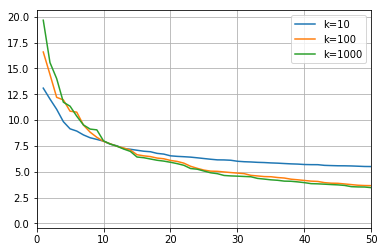

In [11]:
plt.xlim([0,50])
plt.plot(range(1,len(s_10)+1),s_10,label="k=10")
plt.plot(range(1,len(s_100)+1),s_100,label="k=100")
plt.plot(range(1,len(s_1000)+1),s_1000,label="k=1000")
plt.grid(True)
plt.legend()
plt.show()

It looks like 10 is a reasonable number of principal components.

In [12]:
k = 10 # components number

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM for **each** of the 3 feature vectors per business (remember you created feature vectors based on $k = \{10,100,1000\}$). Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the LSA results.
**(4 pts)**

In [13]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import seaborn as sns


X_10 = u_10[:,:k] @ np.diag(s_10[:k])
X_100 = u_100[:,:k] @ np.diag(s_100[:k]) 
X_1000 = u_1000[:,:k] @ np.diag(s_1000[:k]) #  use top 1000 info
print(type(X_10))


#k-means evaluate
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    


<class 'numpy.matrixlib.defmatrix.matrix'>


In [14]:
from sklearn.preprocessing import MinMaxScaler

loc_10 = np.array(loc_10)

scaler = MinMaxScaler(copy=True, feature_range=(1, 20))
l_10 = scaler.fit_transform(loc_10)
print(type(l_10))

<class 'numpy.ndarray'>


In [15]:
X_10 = np.column_stack((X_10,list(l_10[:,0])))
X_10 = np.column_stack((X_10,list(l_10[:,1])))

X_100 = np.column_stack((X_100,list(l_10[:,0])))
X_100 = np.column_stack((X_100,list(l_10[:,1])))

X_1000 = np.column_stack((X_1000,list(l_10[:,0])))
X_1000 = np.column_stack((X_1000,list(l_10[:,1])))


print(X_10.shape)

(5899, 12)


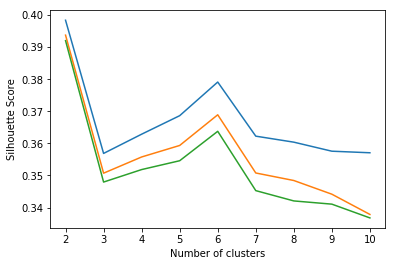

In [107]:
sc_evaluate_clusters(X_10,10)
sc_evaluate_clusters(X_100,10)
sc_evaluate_clusters(X_1000,10)

cluster number = 6 seems reasonable

In [16]:
def find_label(centers,vt):
    t = centers[:,:8] @ vt[:8,:]
    t = np.asarray(t)
    ori_center = t.argsort()[:,::-1]
    return ori_center


Kmeans:

In [17]:
def kmeans_plt(X,loc):
    kmeans = KMeans(init='k-means++', n_clusters=6, n_init=100)
    y_kmeans = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    #print(centers)
    labels = kmeans.labels_
    error = kmeans.inertia_

    return centers,labels


In [18]:
centers_10,labels_10 = kmeans_plt(X_10,l_10)
centers_100,labels_100 = kmeans_plt(X_100,l_10)
centers_1000,labels_1000 = kmeans_plt(X_1000,l_10)

In [116]:
lab_10 = find_label(centers_10,vt_10)
lab_100 = find_label(centers_100,vt_100)
lab_1000 = find_label(centers_1000,vt_1000)


#print(lab_10[0][:5])

def getTerms(label,terms):
    S = []
    for i in range(len(label)):
        s = ""
        for i in label[i][:5]:
            s += terms[i]
            s += ","
        S.append(s)
    return S

print(getTerms(lab_100,terms_100))

['breakfast,server,steak,waiter,dinner,', 'drive,fries,sandwich,fast,cheese,', 'sandwich,fries,bar,cheese,drive,', 'sandwich,drive,cheese,bread,fast,', 'bbq,store,drive,fries,coffee,', 'rice,drive,sandwich,beef,fried,']


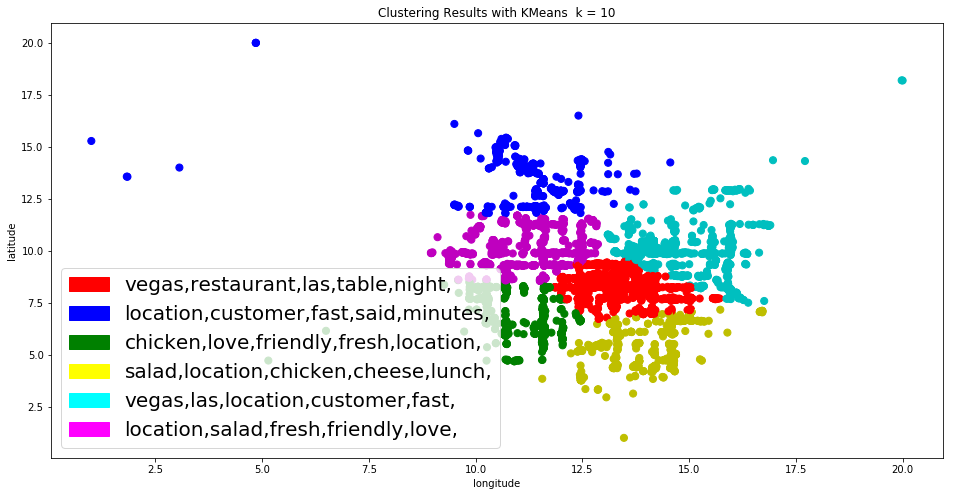

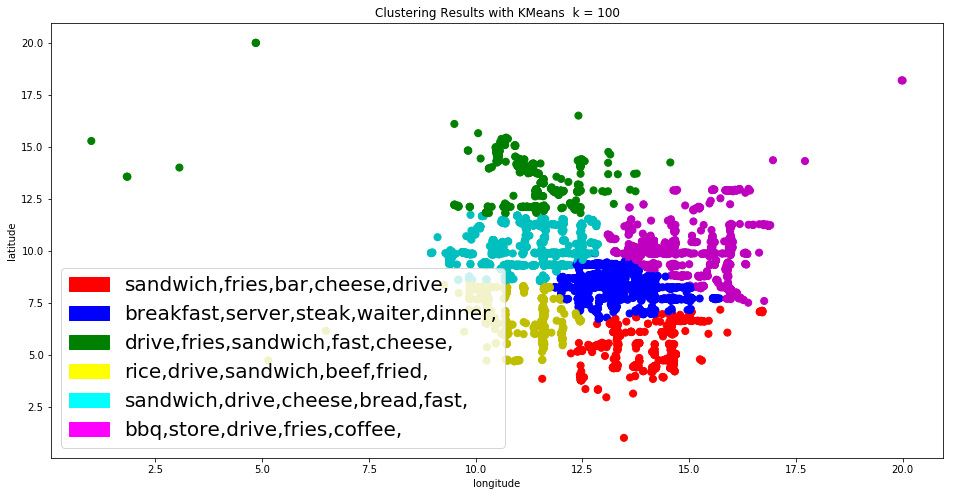

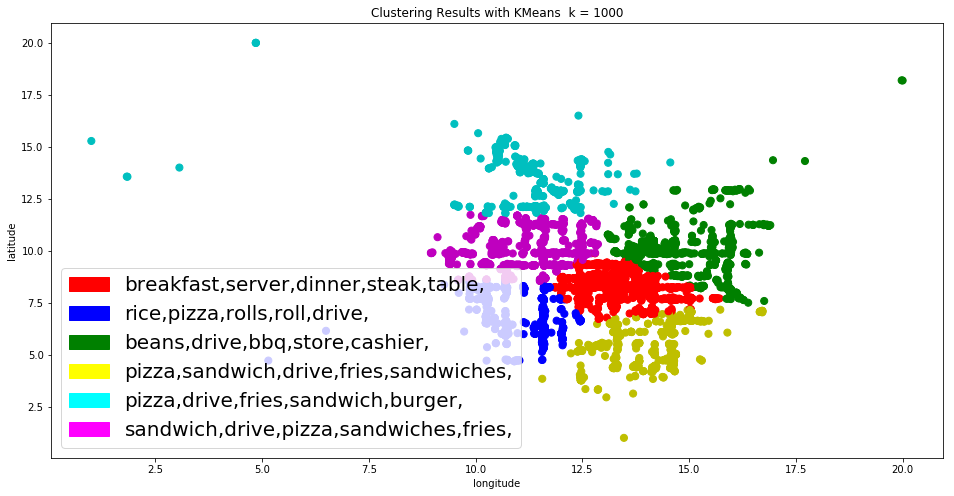

In [117]:
import matplotlib.patches as mpatches

def get_plt(labels,lab,terms,n):
    colors = ['bgrcmy'[p] for p in labels]
    plt.figure(figsize=(16,8))
    T = getTerms(lab,terms)
    blue_patch = mpatches.Patch(color='blue', label=T[0])
    green_patch = mpatches.Patch(color='green', label=T[1])
    red_patch = mpatches.Patch(color='red', label=T[2])
    cyan_patch = mpatches.Patch(color='cyan', label=T[3])
    magenta_patch = mpatches.Patch(color='magenta', label=T[4])
    yellow_patch = mpatches.Patch(color='yellow', label=T[5])

    plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch,cyan_patch,magenta_patch], loc = 'lower left', prop={'size': 20})
    s = 'Clustering Results with KMeans  k = '
    s += str(n)
    plt.title(s)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    _ = plt.scatter(l_10[:, 0], l_10[:, 1], color=colors, s=50)
    
get_plt(labels_10,lab_10,terms_10,10)
get_plt(labels_100,lab_100,terms_100,100)
get_plt(labels_1000,lab_1000,terms_1000,1000)

GMM:

In [130]:
from sklearn import mixture

def sc_evaluate_clusters_GMM(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        gmm = mixture.GaussianMixture(n_components=k, covariance_type='full')
        gmm.fit(X)
        gmm_label = gmm.predict(X)
        s[k] = metrics.silhouette_score(X,gmm_label,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

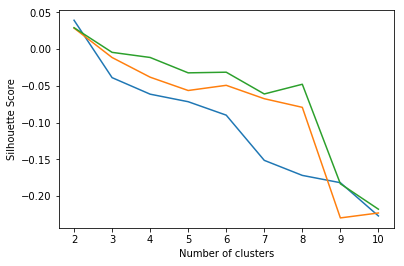

In [132]:
sc_evaluate_clusters_GMM(X_10,10)
sc_evaluate_clusters_GMM(X_100,10)
sc_evaluate_clusters_GMM(X_1000,10)

cluster number = 5 seems reasonable

In [34]:
from sklearn import mixture
import scipy.stats

def gmm_plt(X,loc):
    gmm = mixture.GaussianMixture(n_components=5, covariance_type='tied')
    gmm.fit(X)
    gmm_pred = gmm.predict(X)
    centers = gmm.means_
    
    return centers,gmm_pred


In [35]:
centers_gmm_10,labels_gmm_10 = gmm_plt(X_10,l_10)
centers_gmm_100,labels_gmm_100 = gmm_plt(X_100,l_10)
centers_gmm_1000,labels_gmm_1000 = gmm_plt(X_1000,l_10)

In [79]:
print(centers_gmm_10)

lab_gmm_10 = find_label(centers_gmm_10,vt_10)
lab_gmm_100 = find_label(centers_gmm_100,vt_100)
lab_gmm_1000 = find_label(centers_gmm_1000,vt_1000)


#print(lab_10[0][:5])

def getTerms(label,terms):
    S = []
    for i in range(len(label)):
        s = ""
        for i in label[i][:5]:
            s += terms[i]
            s += ","
        S.append(s)
    return S

print(getTerms(lab_gmm_100,terms_100))

[[ -1.25010248e-02  -2.99707197e-02   1.92191458e-02  -1.07940371e-03
    1.66100334e-02   2.04340142e-02   2.21400304e-02   3.14290383e-03
   -6.56287607e-03   1.16426645e-03   1.36780748e+01   8.74708637e+00]
 [  6.48076624e-02   3.58571528e-02  -1.44401803e-02   6.91669823e-03
   -1.17155890e-02  -1.29491306e-02  -2.60866466e-02   4.81449971e-03
    1.30357770e-02  -1.89486529e-03   1.12171563e+01   1.32351099e+01]
 [  3.98314503e-02   7.75769893e-02  -4.33090069e-02  -1.92052000e-02
   -3.74001299e-02  -2.10733675e-02  -3.28387042e-02  -9.03834954e-03
    2.31708566e-02  -1.42002916e-02   1.13915256e+01   6.76696190e+00]
 [  1.20077651e-02   2.80715762e-02  -2.46659595e-02   1.28092916e-02
   -1.48933508e-02  -3.51132241e-02  -1.71247972e-02  -1.53609945e-02
    8.99364745e-03   7.77951274e-04   1.40424904e+01   5.45781565e+00]
 [ -1.35134096e-02   2.51403358e-02  -1.90613614e-02   1.73480594e-03
   -1.99321560e-02  -2.70723909e-02  -3.04225076e-02   1.93191864e-04
   -5.53873596e-

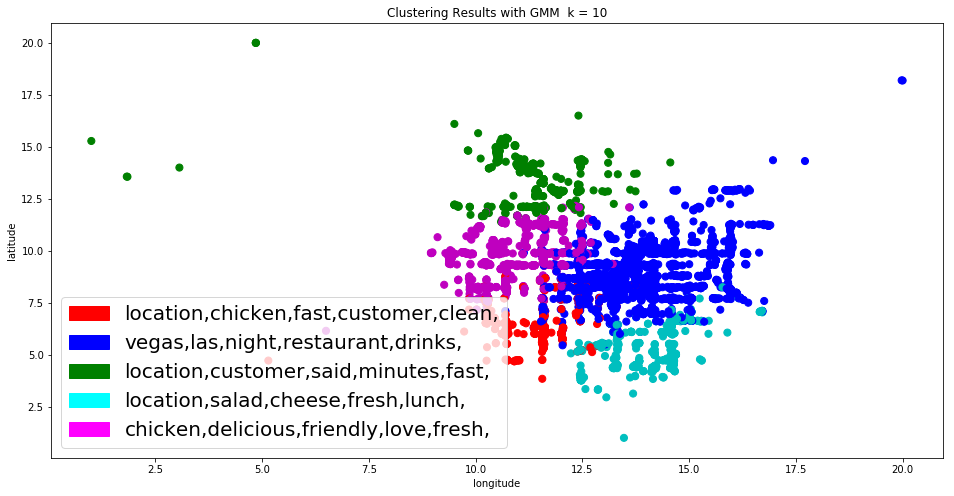

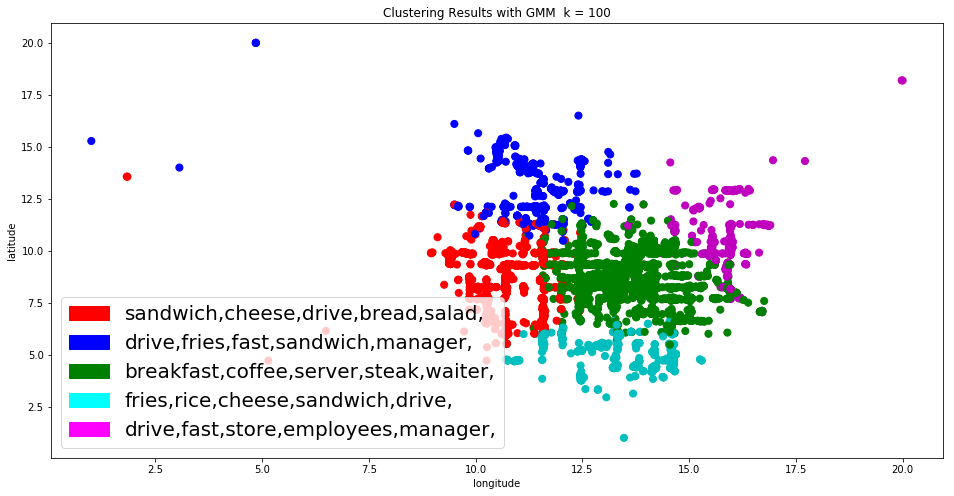

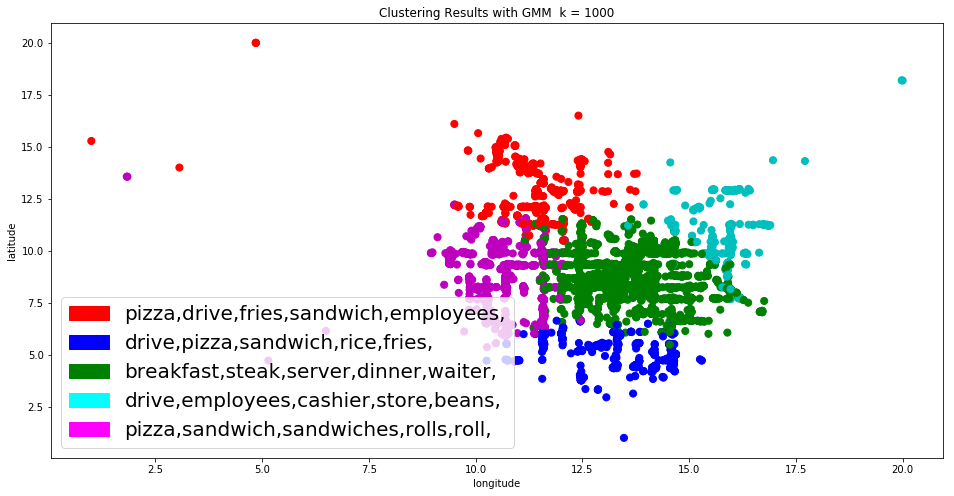

In [38]:
import matplotlib.patches as mpatches

def get_plt(labels,lab,terms,n):
    colors = ['bgrcm'[p] for p in labels]
    plt.figure(figsize=(16,8))
    T = getTerms(lab,terms)
    blue_patch = mpatches.Patch(color='blue', label=T[0])
    green_patch = mpatches.Patch(color='green', label=T[1])
    red_patch = mpatches.Patch(color='red', label=T[2])
    cyan_patch = mpatches.Patch(color='cyan', label=T[3])
    magenta_patch = mpatches.Patch(color='magenta', label=T[4])
    #yellow_patch = mpatches.Patch(color='yellow', label=T[5])

    plt.legend(handles=[red_patch, blue_patch, green_patch,cyan_patch,magenta_patch], loc = 'lower left', prop={'size': 20})
    s = 'Clustering Results with GMM  k = '
    s += str(n)
    plt.title(s)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    _ = plt.scatter(l_10[:, 0], l_10[:, 1], color=colors, s=50)
    
get_plt(labels_gmm_10,lab_gmm_10,terms_10,10)
get_plt(labels_gmm_100,lab_gmm_100,terms_100,100)
get_plt(labels_gmm_1000,lab_gmm_1000,terms_1000,1000)

Hierarchy：

In [44]:
from sklearn import mixture
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance

def sc_evaluate_clusters_Hierarchy(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        feature_matrix_hierarchical = hierarchy.linkage(X, method='ward', metric='euclidean')
        clusters = hierarchy.fcluster(feature_matrix_hierarchical, k, criterion='maxclust')
        s[k] = metrics.silhouette_score(X,clusters,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

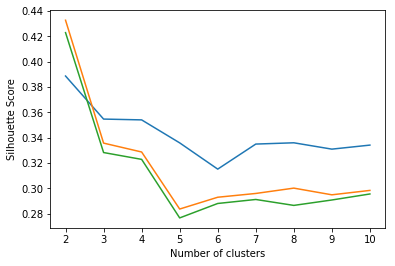

In [45]:
sc_evaluate_clusters_Hierarchy(X_10,10)
sc_evaluate_clusters_Hierarchy(X_100,10)
sc_evaluate_clusters_Hierarchy(X_1000,10)

cluster number = 3 seems reasonable

In [69]:
from operator import add

def find_center(feature_matrix, hier_clus, cluster_num):
    classify_by_clusters_hier = [[] for i in range(cluster_num)]
    for i in range(len(feature_matrix)):
        classify_by_clusters_hier[hier_clus[i]].append(feature_matrix[i])
    for i in range(len(classify_by_clusters_hier)):
        classify_by_clusters_hier[i] = np.mean(np.array(classify_by_clusters_hier[i]), axis = 0)
    return classify_by_clusters_hier


In [74]:
def hier_plt(X):
    feature_matrix_hierarchical = hierarchy.linkage(X, method='ward', metric='euclidean')
    hier_label = hierarchy.fcluster(feature_matrix_hierarchical, 3, criterion='maxclust')
    for i in range(len(hier_label)):
        hier_label[i] -= 1
    centers = np.array(find_center(X, hier_label, 3))
    return centers,hier_label

In [92]:
centers_hier_10,labels_hier_10 = hier_plt(X_10)
centers_hier_100,labels_hier_100 = hier_plt(X_100)
centers_hier_1000,labels_hier_1000 = hier_plt(X_1000)

In [93]:
def transform(centers):
    centers = centers.tolist()
    c = []
    for i in range(len(centers)):
        c.append(centers[i][0])
    return c


In [97]:
center_hier_10 = np.array(transform(centers_hier_10))
center_hier_100 = np.array(transform(centers_hier_100))
center_hier_1000 = np.array(transform(centers_hier_1000))

In [98]:
lab_hier_10 = find_label(center_hier_10,vt_10)
lab_hier_100 = find_label(center_hier_100,vt_100)
lab_hier_1000 = find_label(center_hier_1000,vt_1000)

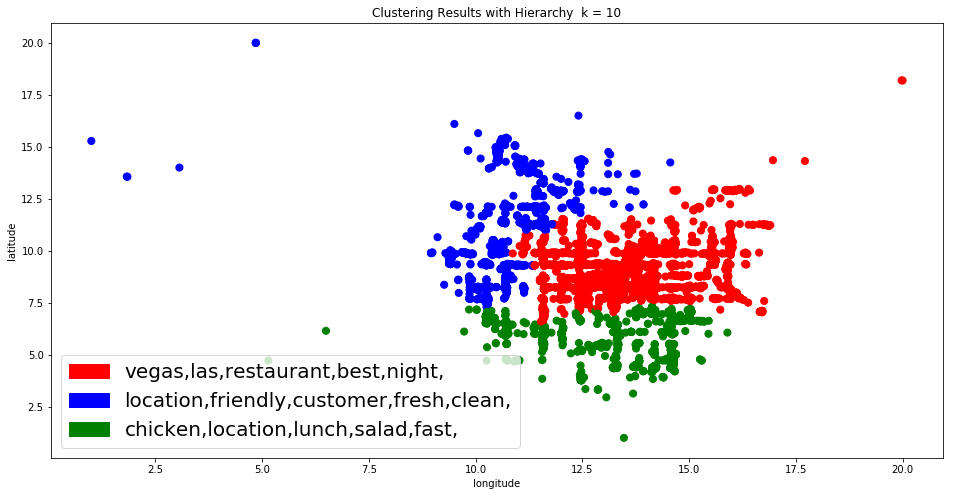

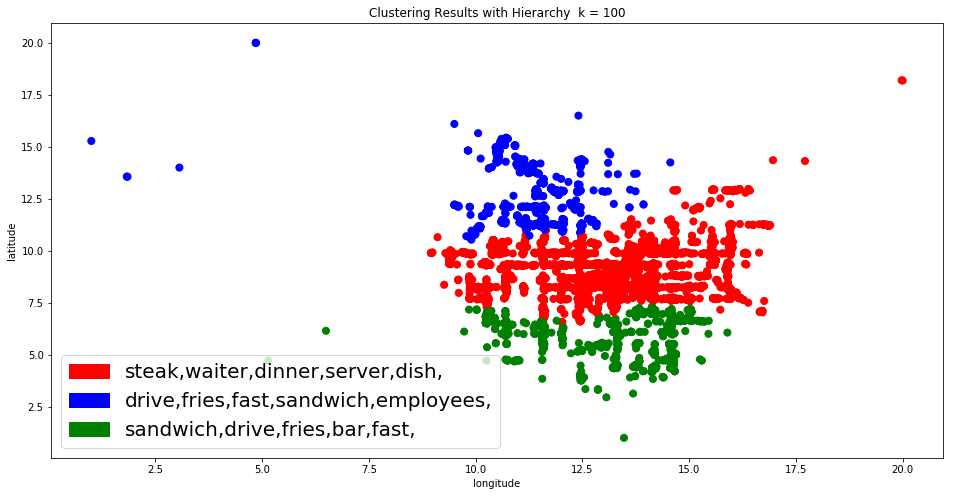

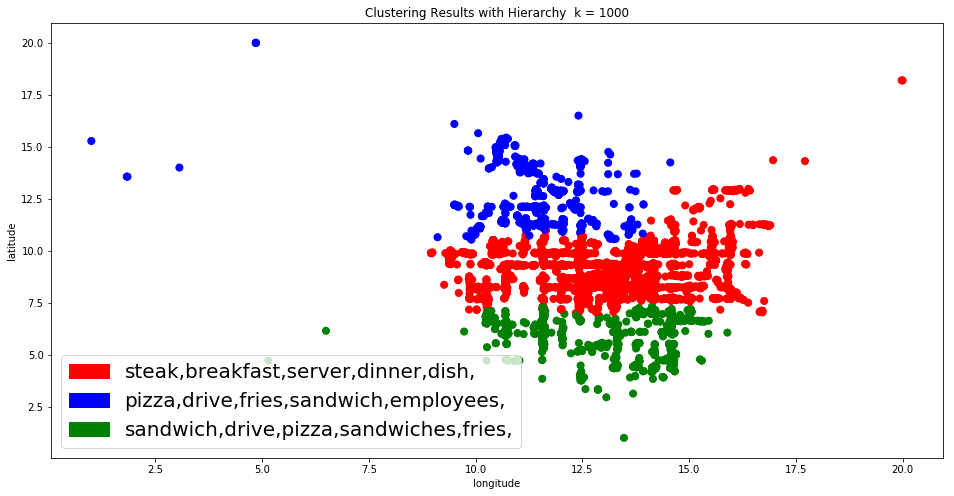

In [99]:
def get_plt_hier(labels,lab,terms,n):
    colors = ['bgr'[p] for p in labels]
    plt.figure(figsize=(16,8))
    T = getTerms(lab,terms)
    blue_patch = mpatches.Patch(color='blue', label=T[0])
    green_patch = mpatches.Patch(color='green', label=T[1])
    red_patch = mpatches.Patch(color='red', label=T[2])

    plt.legend(handles=[red_patch, blue_patch, green_patch], loc = 'lower left', prop={'size': 20})
    s = 'Clustering Results with Hierarchy  k = '
    s += str(n)
    plt.title(s)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    _ = plt.scatter(l_10[:, 0], l_10[:, 1], color=colors, s=50)
    
get_plt_hier(labels_hier_10,lab_hier_10,terms_10,10)
get_plt_hier(labels_hier_100,lab_hier_100,terms_100,100)
get_plt_hier(labels_hier_1000,lab_hier_1000,terms_1000,1000)

What observations can you make regarding the different $k$ values and clusterings? We are expecting comments on the labels of each cluster for the different $k$, on the districts created, on the results of each clustering e.t.c. In general, feel free to report any interesting findings you made. **(2 pts)**

For each clusterings methods, first we compare the output of different K values. I observed that the outcome of k=10 clustering is different with k=100 and k=1000 clustering, while k=100 and k=1000 's outcome is the same(I mean the cluster district not the label). And, as for the label,  k=10's label is quiet different with k=100 and k=1000 while k=100 and k=1000 only have one word differece in the same cluster label. So that,we need to use more information as possible to do clustering in order to eliminate ther error or differences when clustering.   

Then, lets compare the clustering methods. From evaluate the score of silhouette_score of each methods, k-means uses 6 cluster, gmm uses 5 cluster and hierarchy uses 3 cluster. I think k-means methods perform better in providing more information when clustering because it clusters in much more detailed.  But GMM method deal with the outlier in more specifics while other 2 methods just put all the outliers in one cluster.

----------